# Smooth sort benchmark

In [1]:
%pip install numpy
%pip install matplotlib

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os

In [3]:
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

## Generate data

In [4]:
def gen_chunk(n, length):
    digits = np.random.randint(0, len(alphabet), n * length)
    result = []
    for i in range(n):
        item = "".join(map(lambda index: alphabet[index], digits[i * length: (i + 1) * length]))
        result.append(item)
    return result

In [5]:
MAX_CHUNK = 1e6
def gen(N, length):
    f = open("input.txt", "w")
    f.write(f"{N}\n");
    chunks = int(N/MAX_CHUNK)
    for i in range(chunks + 1):
        chunk = gen_chunk(int(max(0, min(MAX_CHUNK, N - i * MAX_CHUNK))), length)
        for item in chunk:
            f.write(f"{item} ")

    f.close()    

## Measure execution time

In [6]:
def execute_sort():
    p = subprocess.Popen("./sort", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    return int(p.communicate()[0])

## Compare execution time for different data sizes

### Using fixed length = 2

In [11]:
data_sizes = np.array([10**4, 5 * 10**4, 10**5, 5 * 10**5, 10**6, 5 * 10**6])
random_data_times = []
sorted_data_times = []

for data_size in data_sizes:
    # generating new data
    gen(data_size, 3)

    # applying sort on random data
    random_data_times.append(execute_sort())

    # applying sort to already sorted data
    os.remove("input.txt")
    os.rename("output.txt", "input.txt")

    sorted_data_times.append(execute_sort())

### Reference complexity function

In [12]:
def n_log_n(l):
    return l * np.log(l)

## Random data

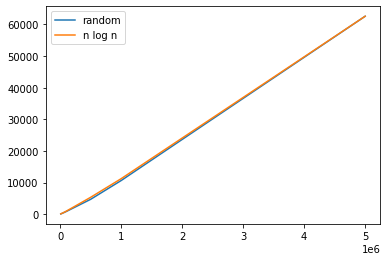

In [29]:
theoretical_random = n_log_n(data_sizes)
constant_random = theoretical_random[-1]/random_data_times[-1] # approximating constant for random data

plt.plot(data_sizes, random_data_times, label = "random")
plt.plot(data_sizes, theoretical_random/constant_random, label = "n log n")
plt.legend()
plt.show()

## Sorted data

[14, 77, 173, 1111, 2538, 15018]


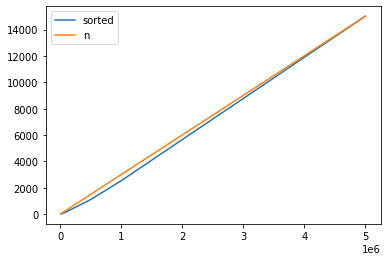

In [30]:
theoretical_sorted = data_sizes
constant_sorted = theoretical_sorted[-1]/sorted_data_times[-1] # approximating constant for sorted data

print(sorted_data_times)

plt.plot(data_sizes, sorted_data_times, label = "sorted")
plt.plot(data_sizes, theoretical_sorted/constant_sorted, label = "n")
plt.legend()
plt.show()

## Different item length

In [36]:
data_lengths = [5, 10, 15, 25, 50]
times = []

for length in data_lengths:
    # generating new data
    gen(1000000, length)
    # applying sort on random data
    times.append(execute_sort())

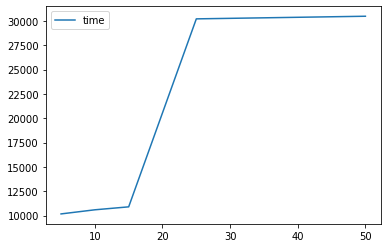

In [37]:
plt.plot(data_lengths, times, label = "time")
plt.legend()
plt.show()